In [1]:
!pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
stroke_df = pd.read_csv("datasets/healthcare-dataset-stroke-data.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

## Pre-Processing

In [5]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
stroke_df = stroke_df.dropna(subset = ['bmi'])
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
columns = {'id', 'ever_married', 'work_type', 'Residence_type'}
stroke_df.drop(columns, axis = 1, inplace = True)
stroke_df

/var/folders/pd/3cvwzls14jn909h9mps787r80000gn/T/ipykernel_88332/10641572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df.drop(columns, axis = 1, inplace = True)


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
5,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


## Data Visualization

In [9]:
stroke_count = (stroke_df['stroke'] == 0).sum()
stroke_count

4700

<Axes: xlabel='age', ylabel='avg_glucose_level'>

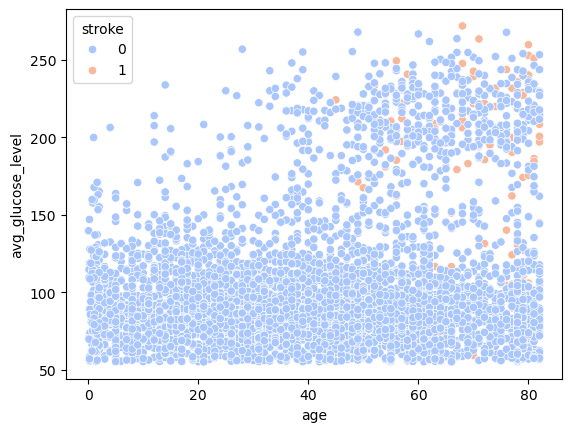

In [187]:
sns.scatterplot(data= stroke_df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm')

/var/folders/pd/3cvwzls14jn909h9mps787r80000gn/T/ipykernel_88332/130922992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = stroke_df, x = 'stroke', y = 'age', palette = 'coolwarm')


<Axes: xlabel='stroke', ylabel='age'>

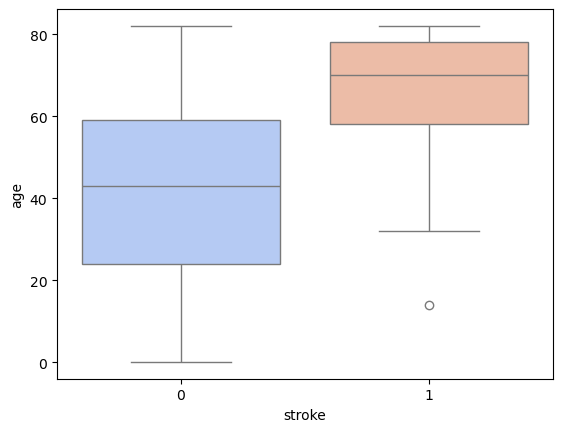

In [189]:
sns.boxplot(data = stroke_df, x = 'stroke', y = 'age', palette = 'coolwarm')

## Modeling + Evaluation

In [192]:
# Random Forest Classification

In [194]:
categorical_columns = ['gender', 'smoking_status']
stroke_encoded = pd.get_dummies(stroke_df, columns=categorical_columns, drop_first=True)

In [196]:
X = stroke_encoded.drop('stroke', axis = 1)
y = stroke_encoded['stroke']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [306]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (3927, 10)
X_test (982, 10)
y_train (3927,)
y_test (982,)


In [322]:
class_weights = {0 : 1, 1: 10}
rf = RandomForestClassifier(n_estimators=100, max_depth=13, min_samples_leaf=5, class_weight= class_weights, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=13,
                       min_samples_leaf=5, random_state=42)

In [324]:
predicted = rf.predict(X_test)

In [326]:
rf.score(X_test, y_test)

0.9358452138492872

In [328]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       950
           1       0.18      0.28      0.22        32

    accuracy                           0.94       982
   macro avg       0.58      0.62      0.59       982
weighted avg       0.95      0.94      0.94       982

